In [99]:
from gridworld import gridworld
import numpy as np
import random
import matplotlib.pyplot as plt

In [130]:
EPOCHS = 1000

In [167]:
class play:
    
    def __init__(self, initial_position):
        # Setting up initial state
        self.initial_position = initial_position
        # Creating environment with 5 X 5 grid and special states
        self.env = gridworld(initial_state = initial_position)
        # Policy parameters
        self.params = np.random.uniform(0,1, size=(3,))
        print("generated params....", self.params)
        # Value function weight 
        self.value_weight = random.random()
        # Step size
        self.alpha = self.beta = 0.01;self.xi = self.alpha;
        # records js
        self.js = [0]
        # mapping for position and state
        self.state_matrix = (np.array(range(25)).reshape(5,5)+1)/25
        # possible action
        self.possible_actions = [1, 2, 3, 4]
        self.j_new = 0
        self.positions = []
        self.positions.append(initial_position)
        self.states = []
        self.states.append(self.get_state(initial_position))
        self.rewards = []
        self.actions = []
        self.EPOCHS = EPOCHS
        self.print_epoch = EPOCHS/10
    
    def boltzman_choice(self,position):
        agg = 0
        for i in self.possible_actions:
            denom = np.exp(np.dot(self.params.T,self.get_feature(position, i)))
            agg = agg + denom
        prob = []
        for i in self.possible_actions:
            numerator = np.exp(np.dot(self.params.T,self.get_feature(position, i)))
            prob.append(numerator/agg)
        return prob
    
    def boltzman(self, position, action):
        numerator = np.exp(np.dot(self.params.T,self.get_feature(position, action)))
        agg = 0
        for i in self.possible_actions:
            denom = np.exp(np.dot(self.params.T,self.get_feature(position, i)))
            agg = agg + denom
        return numerator/agg
    
    def get_state(self, position):
        return self.state_matrix[position[0],position[1]]
    
    def get_feature(self, position, action):
        state = self.get_state(position)
        return np.array([1, state/25, action/4])

    def alpha_beta(self, t):
        alpha = 1 / (divmod(t,50)[0]+1)
        beta =  1 / (divmod(t,50)[0]+1)**(2/3)
        return alpha, beta
    
    def get_psi(self, position, action):
        state = self.get_state(position)
        old_action_feature = self.get_feature(position,action)
        summation_term = np.array([0,0,0])
        for i in self.possible_actions:
            summation_term = summation_term + self.boltzman(position,i)* self.get_feature(position,i)
        return old_action_feature - summation_term
    
    def critic_update(self, old_value_weight, alpha, delta, position):
        return old_value_weight + alpha*delta*self.get_state(position)
    
    def actor_update(self, old_parameter, beta, delta, psi):
        return old_parameter + beta* delta* psi
    
    def run_experiment(self):
        for step in range(self.EPOCHS+1):
            action_prob = self.boltzman_choice(self.positions[-1])
            action = np.random.choice(4,1, action_prob)[0]
            action = action+1
            self.actions.append(action)
            reward, new_position = self.env.step(action-1)
            self.rewards.append(reward)
            self.alpha, self.beta = self.alpha_beta(step)
            self.xi = self.alpha
            # Average reward update
            self.j_new = (1-self.xi)*self.js[-1] + self.xi*reward
            self.js.append(self.j_new)
            # TD error
            del_t = reward - self.j_new + self.value_weight * self.get_state(new_position) +\
                                            self.value_weight * self.get_state(self.positions[-1])
            
            # critic update
            self.value_weight = self.critic_update(self.value_weight, self.alpha, del_t, self.positions[-1])
            
            # Actor update
            self.params = self.actor_update(self.params, self.beta, del_t, self.get_psi(self.positions[-1],action))
            
            # update list
            self.positions.append(new_position)
            self.states.append(self.get_state(new_position))
            if step%self.print_epoch==0:
                print(" {0:} | states: {1:}| rewards: {2:}| J : {3:} | updated".format("step:"+str(step),\
                                                                                        self.states[-1],\
                                                                                        self.rewards[-1],\
                                                                                        self.js[-1]))
                print(self.get_psi(self.positions[-1],action))
            

In [168]:
experiment = play([0,0])
experiment.run_experiment()

generated params.... [0.83492382 0.71950421 0.51211318]
 step:0 | states: 0.04| rewards: -1| J : -1.0 | updated
[ 0.00000000e+00 -2.16840434e-19  3.33959655e-01]
 step:100 | states: 0.68| rewards: 0| J : 1.5520349450071082e-09 | updated
[nan nan nan]
 step:200 | states: 0.28| rewards: 0| J : -0.16398218853703467 | updated
[nan nan nan]
 step:300 | states: 1.0| rewards: 0| J : -0.037514518899661634 | updated
[nan nan nan]
 step:400 | states: 0.32| rewards: 0| J : 0.029348614537235872 | updated
[nan nan nan]
 step:500 | states: 0.6| rewards: -1| J : 0.020877583481195755 | updated
[nan nan nan]
 step:600 | states: 0.84| rewards: -1| J : 0.15633689026021239 | updated
[nan nan nan]
 step:700 | states: 0.96| rewards: 0| J : 0.09467292695611132 | updated
[nan nan nan]
 step:800 | states: 0.68| rewards: 0| J : -0.01477997622959391 | updated
[nan nan nan]
 step:900 | states: 0.64| rewards: 0| J : -0.1513295230096728 | updated

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars



[nan nan nan]
 step:1000 | states: 0.68| rewards: 0| J : -0.004423857903212799 | updated
[nan nan nan]


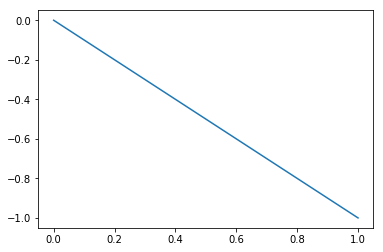

In [166]:
plt.plot(experiment.js)
plt.show()

In [83]:
temp = (np.array(range(25)).reshape(5,5)+1)/25

In [21]:
env = gridworld(initial_state=[0,0])

In [2]:
x = np.array([1,2,3,4,5,6])

In [5]:
def softmax(x):
    '''Compute softmax values of array x.
    @param x the input array
    @return the softmax array
    '''
    return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

In [14]:
softmax([1,2,3,4])

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [ ]:
def bolztman_policy(params, features):
    np.dot(params.T,features)